In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
cd Desktop/stackoverflow_survey_data

C:\Users\Administrator\Desktop\stackoverflow_survey_data


In [30]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [3]:
raw_data= pd.read_csv('C:\\Users\\Administrator\\Desktop\\gdp_raw_data.csv', encoding='latin-1')

In [4]:
print(raw_data.shape)

(270038, 8)


In [5]:
raw_data.head()

,demp_ind,indicator,location,country,time,value,flag codes,flags
0,SP_DYN_TFRT_IN,"Fertility rate, total (births per woman)",AUS,Australia,1970,2.86,NaN,NaN
1,SP_DYN_TFRT_IN,"Fertility rate, total (births per woman)",AUS,Australia,1971,2.96,NaN,NaN
2,SP_DYN_TFRT_IN,"Fertility rate, total (births per woman)",AUS,Australia,1972,2.74,NaN,NaN
3,SP_DYN_TFRT_IN,"Fertility rate, total (births per woman)",AUS,Australia,1973,2.49,NaN,NaN
4,SP_DYN_TFRT_IN,"Fertility rate, total (births per woman)",AUS,Australia,1974,2.40,NaN,NaN


In [6]:
raw_data.isnull().sum()  ##check the null values

demp_ind           0
indicator          0
location           0
country            0
time               0
value           2066
flag codes    267972
flags         267972
dtype: int64

In [7]:
raw_data['indicator'][raw_data['value'].isnull()].unique() ## show the null value 

array(['Population growth (annual %)',
       'Rural population (% of total population)',
       'GDP deflator (base year varies by country)',
       'GDP growth (annual %)',
       'Poverty headcount ratio at $1.90 a day (PPP) (% of population)',
       'PPP conversion factor, GDP (LCU per international $)',
       'Total debt service (% of GNI)', 'GNI per capita (current LCU)',
       'Official exchange rate (LCU per US$, period average)',
       'GDP per capita (current LCU)',
       'PPP conversion factor, private consumption (LCU per international $)',
       'DEC alternative conversion factor (LCU per US$)'], dtype=object)

In [8]:
###delet the Null value
raw_data_dropna = raw_data.dropna(subset=['value'])

In [9]:
raw_data_dropna.head() ##after remove the null value

,demp_ind,indicator,location,country,time,value,flag codes,flags
0,SP_DYN_TFRT_IN,"Fertility rate, total (births per woman)",AUS,Australia,1970,2.86,NaN,NaN
1,SP_DYN_TFRT_IN,"Fertility rate, total (births per woman)",AUS,Australia,1971,2.96,NaN,NaN
2,SP_DYN_TFRT_IN,"Fertility rate, total (births per woman)",AUS,Australia,1972,2.74,NaN,NaN
3,SP_DYN_TFRT_IN,"Fertility rate, total (births per woman)",AUS,Australia,1973,2.49,NaN,NaN
4,SP_DYN_TFRT_IN,"Fertility rate, total (births per woman)",AUS,Australia,1974,2.40,NaN,NaN


In [10]:
raw_data_dropna.shape

(267972, 8)

In [11]:
raw_data_withoutna = raw_data_dropna[['demp_ind','indicator','location','country','time','value']]

In [12]:
raw_data_withoutna.isnull().sum()

demp_ind     0
indicator    0
location     0
country      0
time         0
value        0
dtype: int64

In [13]:
raw_data_withoutna.head()

,demp_ind,indicator,location,country,time,value
0,SP_DYN_TFRT_IN,"Fertility rate, total (births per woman)",AUS,Australia,1970,2.86
1,SP_DYN_TFRT_IN,"Fertility rate, total (births per woman)",AUS,Australia,1971,2.96
2,SP_DYN_TFRT_IN,"Fertility rate, total (births per woman)",AUS,Australia,1972,2.74
3,SP_DYN_TFRT_IN,"Fertility rate, total (births per woman)",AUS,Australia,1973,2.49
4,SP_DYN_TFRT_IN,"Fertility rate, total (births per woman)",AUS,Australia,1974,2.40


In [14]:
##investigate all the elements within each feature
for column in raw_data_withoutna:
    unique_vals=np.unique(raw_data_withoutna[column])
    nr_values = len(unique_vals)
    if nr_values < 30:
        print('The number of values for feature {}:{}--{}'. format(column, nr_values, unique_vals))
    else:
        print('The number of values for feature {}:{}'. format(column, nr_values))

The number of values for feature demp_ind:35
The number of values for feature indicator:35
The number of values for feature location:233
The number of values for feature country:233
The number of values for feature time:50
The number of values for feature value:125438


In [15]:
raw_data_withoutna['indicator'].unique()

array(['Fertility rate, total (births per woman)',
       'Life expectancy at birth, total (years)',
       'Mortality rate, infant (per 1,000 live births)',
       'Population growth (annual %)',
       'Prevalence of HIV, total (% of population ages 15-49)',
       'Rural population (% of total population)', 'GDP (current LCU)',
       'GDP (current US$)', 'GDP deflator (base year varies by country)',
       'GDP growth (annual %)', 'GDP per capita (current US$)',
       'GDP per capita, PPP (current international $)',
       'GDP, PPP (current international $)',
       'General government total expenditure (current LCU)',
       'GNI per capita, Atlas method (current US$)',
       'GNI per capita, PPP (current international $)',
       'Poverty headcount ratio at $1.90 a day (PPP) (% of population)',
       'PPP conversion factor, GDP (LCU per international $)',
       'Total debt service (% of GNI)', 'Total population ',
       'Population aged 65 years or older ',
       'Populati

In [16]:
forecast_data = raw_data_withoutna[raw_data_withoutna['indicator']=='GDP per capita, PPP (current international $)']


In [17]:
print(forecast_data)

                 demp_ind                                      indicator  \
76848   NY_GDP_PCAP_PP_CD  GDP per capita, PPP (current international $)   
76849   NY_GDP_PCAP_PP_CD  GDP per capita, PPP (current international $)   
76850   NY_GDP_PCAP_PP_CD  GDP per capita, PPP (current international $)   
76851   NY_GDP_PCAP_PP_CD  GDP per capita, PPP (current international $)   
76852   NY_GDP_PCAP_PP_CD  GDP per capita, PPP (current international $)   
...                   ...                                            ...   
267165  NY_GDP_PCAP_PP_CD  GDP per capita, PPP (current international $)   
267166  NY_GDP_PCAP_PP_CD  GDP per capita, PPP (current international $)   
267167  NY_GDP_PCAP_PP_CD  GDP per capita, PPP (current international $)   
267168  NY_GDP_PCAP_PP_CD  GDP per capita, PPP (current international $)   
267169  NY_GDP_PCAP_PP_CD  GDP per capita, PPP (current international $)   

       location     country  time     value  
76848       AUS   Australia  1990  17333.

In [18]:
forecast_data = forecast_data[~forecast_data['country'].isin(['Djibouti','South Sudan','Curabao','Erutrea','Bermuda','Venezuela(Bolivarian Republic of)'])]
forecast_data.head(5)

,demp_ind,indicator,location,country,time,value
76848,NY_GDP_PCAP_PP_CD,"GDP per capita, PPP (current international $)",AUS,Australia,1990,17333.10
76849,NY_GDP_PCAP_PP_CD,"GDP per capita, PPP (current international $)",AUS,Australia,1991,17793.60
76850,NY_GDP_PCAP_PP_CD,"GDP per capita, PPP (current international $)",AUS,Australia,1992,18189.34
76851,NY_GDP_PCAP_PP_CD,"GDP per capita, PPP (current international $)",AUS,Australia,1993,19130.89
76852,NY_GDP_PCAP_PP_CD,"GDP per capita, PPP (current international $)",AUS,Australia,1994,20063.81


In [19]:
forecast_data = forecast_data[['country','time','value']]
forecast_data.head()

,country,time,value
76848,Australia,1990,17333.10
76849,Australia,1991,17793.60
76850,Australia,1992,18189.34
76851,Australia,1993,19130.89
76852,Australia,1994,20063.81


In [20]:
forecast_data['time']=forecast_data['time'].astype(str)+'-01-01'
forecast_data['time'] = pd.to_datetime(forecast_data['time'])

forecast_data.head()

,country,time,value
76848,Australia,1990-01-01,17333.10
76849,Australia,1991-01-01,17793.60
76850,Australia,1992-01-01,18189.34
76851,Australia,1993-01-01,19130.89
76852,Australia,1994-01-01,20063.81


In [21]:
x_train = forecast_data[forecast_data['time']<'2012-01-01']
x_valid = forecast_data[forecast_data['time']>='2011-01-01']

print('x-train shape', x_train.shape)
print('x_valid', x_valid.shape)

x_train['time'].unique()       ###make sure the data is clearance to prepare for t-series 

x-train shape (4009, 3)
x_valid (1328, 3)


array(['1990-01-01T00:00:00.000000000', '1991-01-01T00:00:00.000000000',
       '1992-01-01T00:00:00.000000000', '1993-01-01T00:00:00.000000000',
       '1994-01-01T00:00:00.000000000', '1995-01-01T00:00:00.000000000',
       '1996-01-01T00:00:00.000000000', '1997-01-01T00:00:00.000000000',
       '1998-01-01T00:00:00.000000000', '1999-01-01T00:00:00.000000000',
       '2000-01-01T00:00:00.000000000', '2001-01-01T00:00:00.000000000',
       '2002-01-01T00:00:00.000000000', '2003-01-01T00:00:00.000000000',
       '2004-01-01T00:00:00.000000000', '2005-01-01T00:00:00.000000000',
       '2006-01-01T00:00:00.000000000', '2007-01-01T00:00:00.000000000',
       '2008-01-01T00:00:00.000000000', '2009-01-01T00:00:00.000000000',
       '2010-01-01T00:00:00.000000000', '2011-01-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [22]:
#filtering the train data 
au=x_train[x_train['country']== 'Australia']
au2 = au[['time','value']]


In [23]:
##filtering the valid data

au_v =x_valid[x_valid['country'] == 'Australia']
au_v2 = au_v[['time','value']]

In [24]:
###set the data into index 
au2.set_index('time',inplace =True)
au_v2.set_index('time', inplace = True)

In [25]:
##setting the index for 6 years
index_7_years= pd.date_range(au2.index[-1],freq= 'AS',periods =7)
index_7_years

DatetimeIndex(['2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01',
               '2015-01-01', '2016-01-01', '2017-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')

In [67]:
### running ARIMA with random numbers
model_arima =ARIMA(au2,order=(0,2,3))##start 2-0-0 and move to the best
model_arima_fit = model_arima.fit(disp=-1)

#saving ARIMA predictions
fcast1 = model_arima_fit.forecast(7)[0]

C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred

In [68]:
#passing the same index as the others
fcast1= pd.Series(facst1, index=index_7_years)
fcast1 = facst1.rename("Arima")

<AxesSubplot:title={'center':'AU'}, xlabel='time', ylabel='value'>

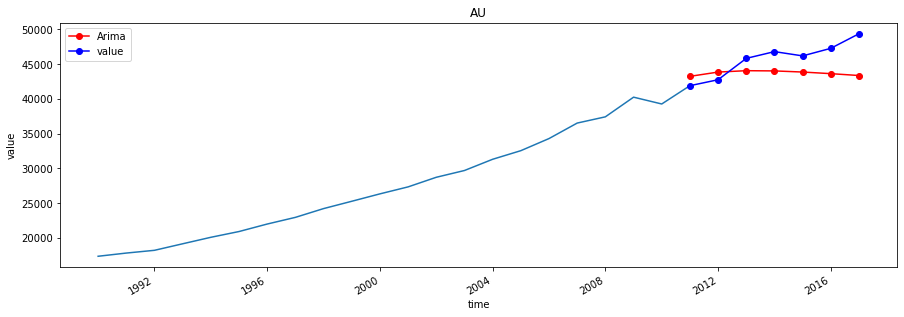

In [69]:
#ploting the predictions
fig, ax=plt.subplots(figsize=(15,5))
chart = sns.lineplot(x ='time', y='value',data=au)
chart.set_title('AU')
fcast1.plot(ax=ax, color ='red', marker ="o", legend =True)
au_v2.plot(ax=ax, color='blue',marker="o", legend=True)

In [70]:
from sklearn.metrics import mean_squared_error

In [71]:
#printing the AI 
print('The RMSE of ARIMA is :', mean_squared_error(au_v['value'].values, fcast1.values,squared=False))

The RMSE of ARIMA is : 3135.8361014575444


In [48]:
import itertools

In [62]:
import itertools
p=d=q=range(0,5)
pdq=list(itertools.product(p,d,q))

for param in pdq:
    try: 
        model_arima =ARIMA(au2, order=param)
        model_arima_fit = model_arima.fit()
        print(param, model_arima_fit.aic)
    except:
        continue
##The Akaike information criterion (AIC) is an estiamtor of in-sample prediction error and thereby relative quality of statistical models 
##for a given set of data.

##it's like the mean squared error in regression -The samller the number, the better

C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\base\mod

(0, 0, 0) 460.0842007079433
(0, 0, 1) 439.3169346523912
(0, 0, 2) 424.2923897249178
(0, 1, 0) 343.29855716475754
(0, 1, 1)

C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\base\

 342.13472698140345
(0, 1, 2) 334.7675360651787
(0, 1, 3) 334.1124514077473


C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base

(0, 1, 4) 331.38405220880065
(0, 2, 0) 348.12476526480964
(0, 2, 1) 329.9389576554151
(0, 2, 2) 327.92437568271913
(0, 2, 3) 322.2395887100713
(0, 2, 4) nan


C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:726: RuntimeWarning: invalid value encountered in double_scalars
  tmp[kiter] = (macoefs[kiter]-b *macoefs[j-kiter-1])/(1-b**2)
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:728: RuntimeWarning: divide by zero encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
C:\Users\Administrator\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:410: RuntimeWarning: invalid value encountered in subtract
  dx = (

(1, 0, 0) 391.5854947419732
(1, 1, 0) 338.7412422842247


C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                

(1, 1, 2) 329.2173208581414
(1, 2, 0) 352.59008439045454
(2, 0, 0) 386.74761703687534


C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                

C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMA

(3, 0, 0) 378.63624018018277


C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until the

(4, 2, 0) 360.58837918987524


C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\arim

In [45]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


In [75]:
#### option 2 Auto ARIMA 

#Running auto ARIMA 
auto_arima_model = pm.auto_arima(au2, seasonal=False, m=7)

#Read more about setting m
#https://alkaline-ml.com/pmdarima/tips_and_tricks.html

#make your forecasts 
fcast2 = auto_arima_model.predict(7)
fcast2 = pd.Series(fcast2, index=index_7_years)
fcast2 = fcast2.rename("Auto Arima")

##ploting the predictions
fig,ax=plt.subplots(figsize =(15,5))
chart = sns.lineplot(x='time', y='value', data = au)
chart.set_title('AU')
fcast2.plot(ax=ax, color='red', marker="o",legend=True)
au_v2.plot(ax=ax, color ='blue', marker ="o",legend=True)

##Printing the AI
print('The RMSE of auto-arima is:', mean_squared_error(au_v['value'].values, fcast2.values, squared=False))

NameError: name 'pm' is not defined

The next sample about time series 